# Using Decision Tree Classifier for Classifing the diffrent species of flower

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null Values in the dataset 

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

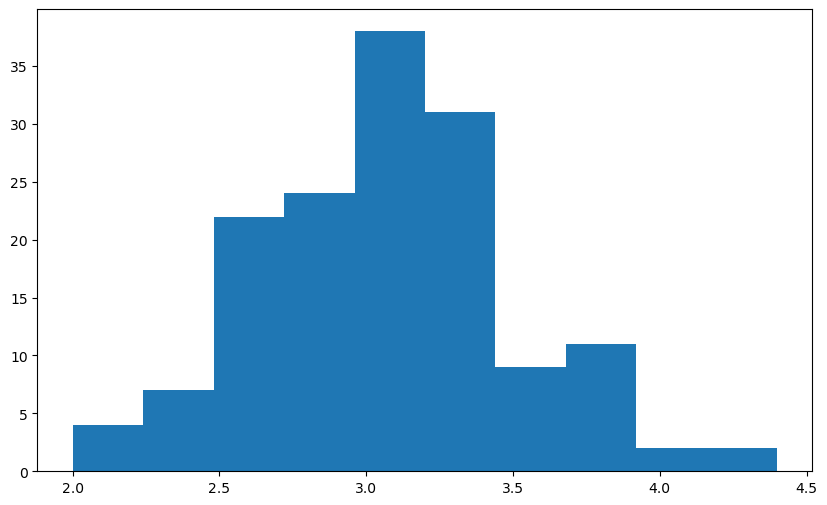

In [18]:
# Let'S Visualise this Dataset 
plt.figure(figsize=(10,6))
plt.hist(df['SepalWidthCm'])

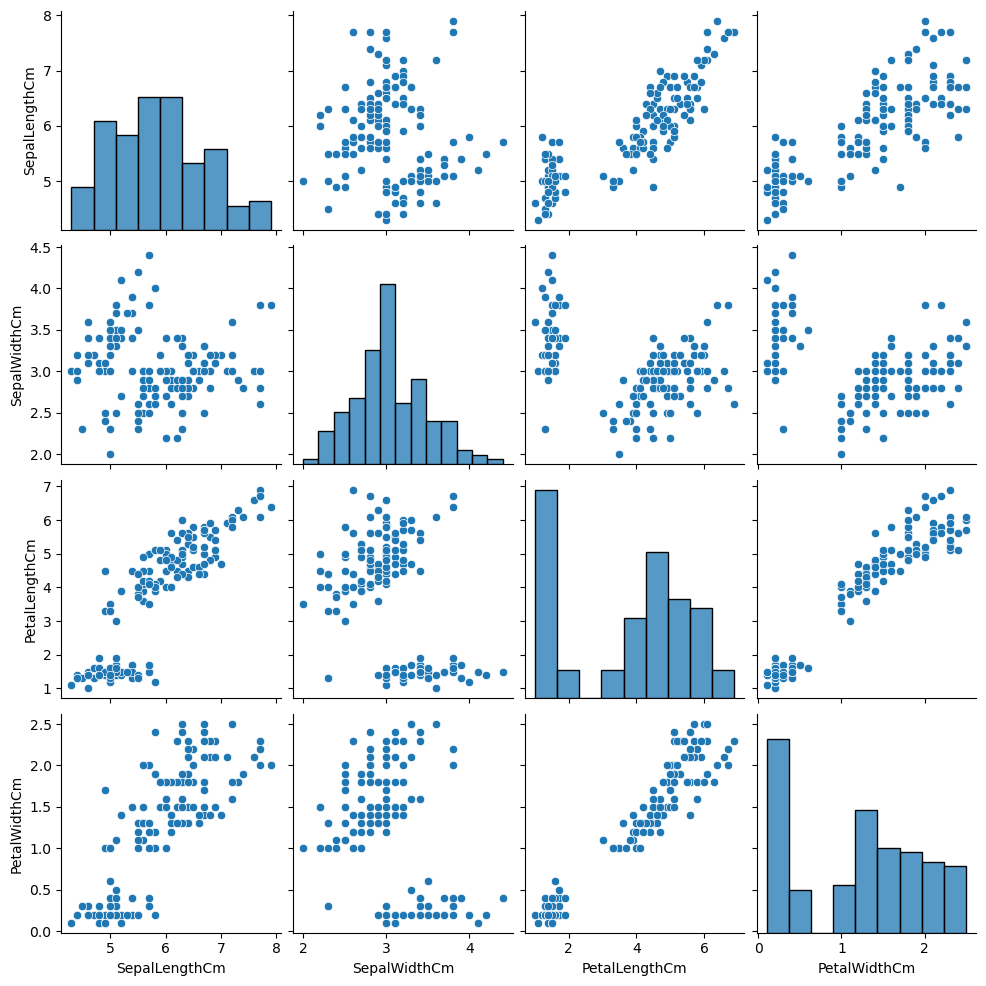

In [20]:
sns.pairplot(df);

In [23]:
# let's Divide the Data into Dependent And Independent Features
X = df.drop('Species',axis = 1)
Y = df['Species']

In [24]:
# spliting the data into traning and testing data\
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y,test_size= 0.2 , random_state=42) 

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train , Y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

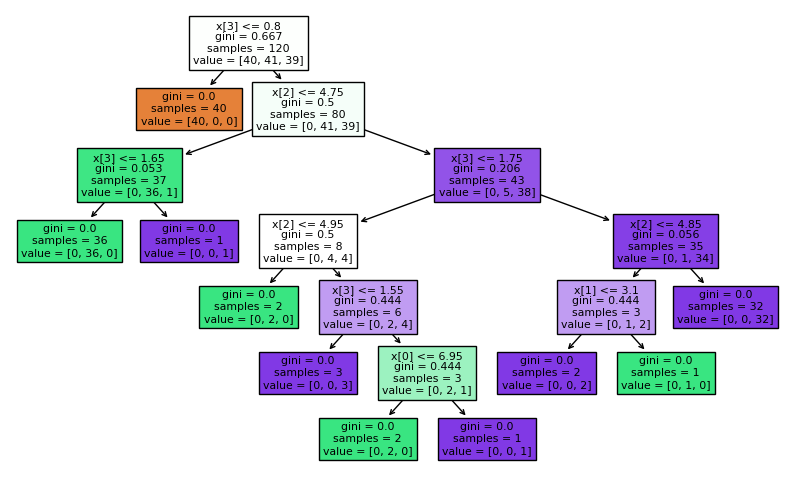

In [30]:
# Visualising the Tree 
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(model , filled= True)

In [31]:
# Post Pruning the given tree By Creating a new model 
model2 = DecisionTreeClassifier(max_depth=2)
model2.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

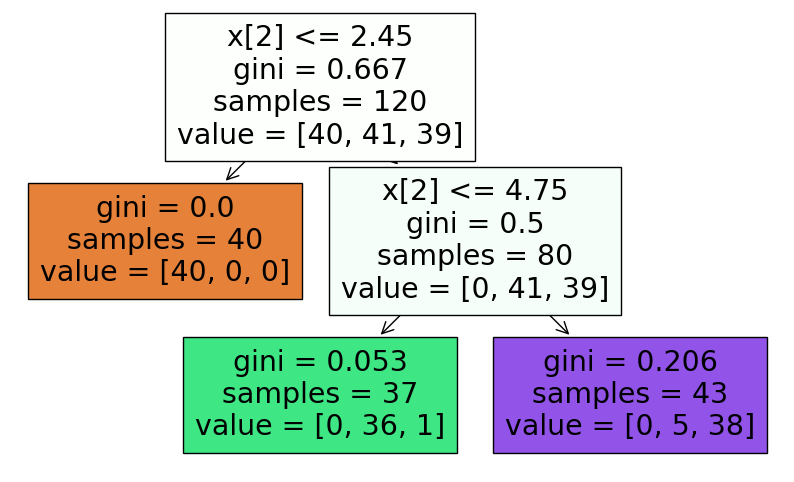

In [32]:
# Visualising the Tree 
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(model2 , filled= True)

In [33]:
# doing the predection using both the models
y_preds =model.predict(X_test)
y_preds2 = model2.predict(X_test)

In [34]:
# Checking the Performacne of the given model
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test , y_preds))
print(confusion_matrix(Y_test , y_preds))
print(classification_report(Y_test , y_preds2))
print(confusion_matrix(Y_test , y_preds2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


We can clearly See that the model is overfitting in the first case and 2nd case when we do post pruning it is somewhat generalised

Now We Are going to hyperparameter Tuning using the Pre-Pruning 
we will be using GridSearch CV to use all the params and see the best fit params for the same 

In [35]:
params  = {
   'criterion' : ['gini','entropy', 'log_loss'],
  'splitter': ['best', 'random'],
   'max_depth' : [1,2,3,4,5],
   'max_features'  : ['sqrt', 'log2']
   

}

In [36]:
from sklearn.model_selection import GridSearchCV 
model3 = DecisionTreeClassifier()

grid = GridSearchCV(model3 , param_grid=params ,cv=5 , scoring = 'accuracy')

In [37]:
grid.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [38]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [39]:
grid.best_score_

0.95